In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.DataFrame({
    "pH":[3.0,5.5,2.5,7.0,4.0,6.5,3.5,6.0,2.0,7.5,4.5,5.0,2.8,8.0],
    "Concentração":['Concentrada', 'Diluída', 'Concentrada', 'Diluída', 'Concentrada', 'Diluída', 'Concentrada','Diluída',
                    'Concentrada','Diluída','Concentrada','Diluída','Concentrada','Diluída'],
    "Cheiro":['Com cheiro', 'Sem cheiro', 'Com cheiro', 'Sem cheiro', 'Com cheiro', 'Sem cheiro', 'Com cheiro', 'Sem cheiro', 
              'Com cheiro', 'Sem cheiro', 'Com cheiro', 'Sem cheiro', 'Com cheiro', 'Sem cheiro'],
    "Classe":['Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida', 'Básica', 
              'Ácida', 'Básica', 'Ácida', 'Básica']
    })

In [14]:
data['Concentração']=data['Concentração'].map({
    'Concentrada':0,'Diluída':1
})
data['Cheiro']=data['Cheiro'].map({
    'Com cheiro':2, 'Sem cheiro':3
})

In [21]:
data.head()

,pH,Concentração,Cheiro,Classe
0,3.0,0,2,Ácida
1,5.5,1,3,Básica
2,2.5,0,2,Ácida
3,7.0,1,3,Básica
4,4.0,0,2,Ácida


In [16]:
X = data[['pH', 'Concentração', 'Cheiro']]

y = data['Classe']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)

In [18]:
model = SVC(kernel= 'linear') 
model.fit(X_train,y_train) 

SVC(kernel='linear')

In [19]:
y_pred = model.predict(X_test)

In [20]:
X_test

,pH,Concentração,Cheiro
9,7.5,1,3
11,5.0,1,3
0,3.0,0,2
12,2.8,0,2
5,6.5,1,3


In [22]:
acc = accuracy_score(y_pred,y_test)
acc

1.0

In [23]:
cr=classification_report(y_pred,y_pred)
print(cr)

              precision    recall  f1-score   support

      Básica       1.00      1.00      1.00         3
       Ácida       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [24]:
cm=confusion_matrix(y_pred,y_test)
print(cm)

[[3 0]
 [0 2]]


Text(0.5, 1.0, 'Matriz de confusão para o algoritmo SVM')

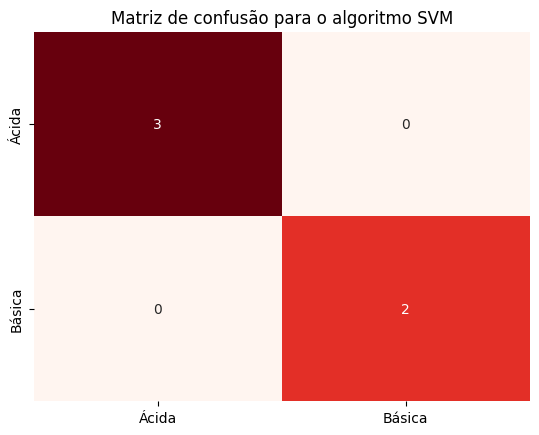

In [26]:
sns.heatmap(cm,annot=True, fmt='d', cmap='Reds', cbar=False, 
            xticklabels=['Ácida', 'Básica'], 
            yticklabels=['Ácida', 'Básica'])    
                         
plt.title('Matriz de confusão para o algoritmo SVM')    

Text(0.5, 1.0, 'pH vs. Concentração')

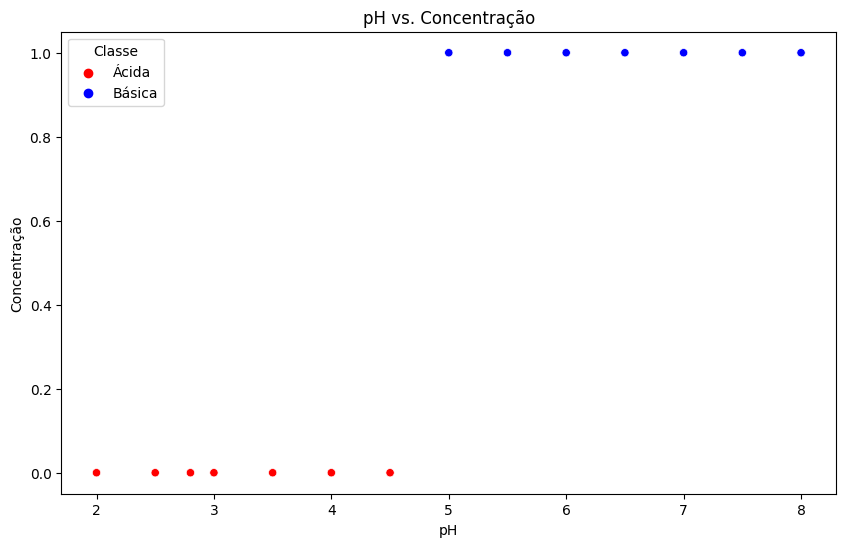

In [29]:
palette = {'Ácida':"red",'Básica':"blue"}
plt.figure(figsize=(10,6))
sns.scatterplot(x='pH',y='Concentração',hue='Classe',data =data,
                palette = palette)

plt.title('pH vs. Concentração')